In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


In [2]:
df_a=pd.read_csv('/kaggle/input/titanic/train.csv')
df_b=pd.read_csv('/kaggle/input/titanic/test.csv')
df_g=pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
df_a

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df_a['Age']=df_a['Age'].fillna(df_a['Age'].mean())

In [5]:
df_d=pd.get_dummies(df_a['Sex'])

In [6]:
df_a.drop(['Sex','Name'],inplace=True,axis=1)

In [7]:
import pandas as pd
import numpy as np
pd.pivot_table(df_a,values='Survived',index=['Embarked'],aggfunc=np.sum)

,Survived
Embarked,
C,93
Q,30
S,217


In [8]:
df_a['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [9]:
df_a['female']=df_d['female']
df_a['male']=df_d['male']

In [10]:
pd.pivot_table(df_a,values=['Survived'],index=['Pclass','Embarked'],aggfunc=np.sum)

Survived
Pclass Embarked          
1      C               59
       Q                1
       S               74
2      C                9
       Q                2
       S               76
3      C               25
       Q               27
       S               67

In [11]:
df_a['Cabin'].dropna(axis=0)

1              C85
3             C123
6              E46
10              G6
11            C103
          ...     
871            D35
872    B51 B53 B55
879            C50
887            B42
889           C148
Name: Cabin, Length: 204, dtype: object

In [12]:
df_a.drop('Cabin',inplace=True,axis=1)

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df_a.head()
Ticket=df_a['Ticket']

In [15]:
df_a['Embarked'].dropna(axis=0,inplace=True)

In [16]:
df_a.pivot_table(values='Survived',index=['female','male'],aggfunc=[np.sum,np.mean])

,,sum,mean
,,Survived,Survived
female,male,,
0,1,109,0.188908
1,0,233,0.742038


* **Female had the highest rate of survival with 75%**
* **Male had only 18% percent survival rate**

In [17]:
df_a.pivot_table(values='Survived',index=['female','male','Parch'],aggfunc=[np.sum,np.mean])

sum      mean
                  Survived  Survived
female male Parch                   
0      1    0           80  0.165289
            1           19  0.327586
            2           10  0.322581
            3            0  0.000000
            4            0  0.000000
            5            0  0.000000
1      0    0          153  0.788660
            1           46  0.766667
            2           30  0.612245
            3            3  0.750000
            4            0  0.000000
            5            1  0.250000
            6            0  0.000000

* **Less the number of parents or children higher the survival rate for females**
* **This is not in the case of males**
* **males who have greater than 2 parents or children have no probability of survival**

In [18]:
df_a.pivot_table(values='Survived',index=['female','male','Embarked'],aggfunc=[np.sum,np.mean])

sum      mean
                     Survived  Survived
female male Embarked                   
0      1    C              29  0.305263
            Q               3  0.073171
            S              77  0.174603
1      0    C              64  0.876712
            Q              27  0.750000
            S             140  0.689655

> **People who have Embarkation from Cherbourg has highest survival rates where female has 87% and male has 30%***

In [19]:
df_a.pivot_table(values='Survived',index=['female','male','SibSp','Parch'],aggfunc=[np.sum,np.mean])

sum      mean
                        Survived  Survived
female male SibSp Parch                   
0      1    0     0           64  0.155718
                  1            4  0.285714
                  2            5  0.555556
            1     0           14  0.233333
                  1           14  0.451613
                  2            4  0.500000
                  3            0  0.000000
                  4            0  0.000000
                  5            0  0.000000
            2     0            2  0.153846
                  1            1  0.500000
            3     1            0  0.000000
                  2            0  0.000000
            4     1            0  0.000000
                  2            1  0.333333
            5     2            0  0.000000
            8     2            0  0.000000
1      0    0     0           99  0.785714
                  1           21  0.875000
                  2           16  0.800000
                  3            1  1.000000
                  4            0  0.000000
                  5            0  0.000000
            1     0           50  0.793651
                  1           20  0.769231
                  2            8  0.727273
                  3            1  0.500000
                  4            0  0.000000
                  5            1  0.500000
                  6            0  0.000000
            2     0            2  0.666667
                  1            5  1.000000
                  2            2  0.500000
                  3            1  1.000000
            3     0            2  1.000000
                  1            0  0.000000
                  2            2  0.500000
            4     2            2  0.333333
            5     2            0  0.000000
            8     2            0  0.000000

In [20]:
df_a.drop(['PassengerId','Ticket'],axis=1,inplace=True)

In [21]:
dd=pd.get_dummies(df_a['Embarked'])

In [22]:
df_a['C']=dd['C']
df_a['Q']=dd['Q']
df_a['S']=dd['S']

In [23]:
df_a.drop(['Embarked'],inplace=True,axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa4f408c6d0>]],
      dtype=object)

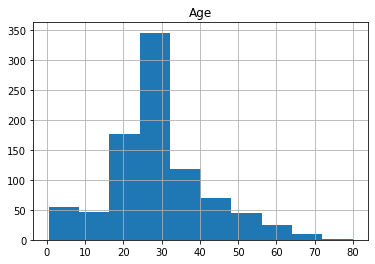

In [24]:
df_a.hist('Age')

* **Most of people are between the age 25-32**

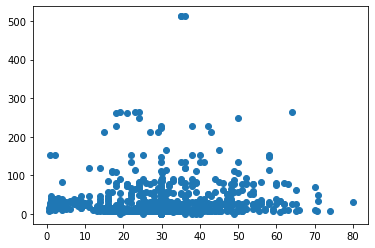

In [25]:
plt.scatter(df_a['Age'],df_a['Fare'])

* **Only two people have paid the fare of 500**
* **Almost all of them have paid fare below 100** 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa4efd94950>]],
      dtype=object)

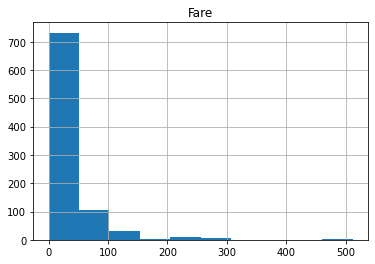

In [26]:
df_a.hist('Fare')

In [27]:
df_a.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'female', 'male',
       'C', 'Q', 'S'],
      dtype='object')

In [28]:
df_a.pivot_table(values='Fare',index=['Survived','male','female'],aggfunc=np.mean)

Fare
Survived male female           
0        0    1       23.024385
         1    0       21.960993
1        0    1       51.938573
         1    0       40.821484

* **People who have survived have paid on average of 40 USD**
* **As Female have the high survival rates they have paid more in average than men**

In [29]:
df_a["Ticket"]=Ticket

In [30]:
bb=df_a[df_a['Ticket'].str.startswith('PC')]#.value_counts()

In [31]:
print(bb['Fare'].mean())
print(df_a['Fare'].mean())

122.08048333333332
32.2042079685746


In [32]:
bb['Survived'].value_counts(0)

1    39
0    21
Name: Survived, dtype: int64

* **The Ticket starting with PC has the highest average**
* **This ticket type had about 66% survival rate**

In [33]:
df_a#['Ticket'].value_counts()

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S,Ticket
0,0,3,22.000000,1,0,7.2500,0,1,0,0,1,A/5 21171
1,1,1,38.000000,1,0,71.2833,1,0,1,0,0,PC 17599
2,1,3,26.000000,0,0,7.9250,1,0,0,0,1,STON/O2. 3101282
3,1,1,35.000000,1,0,53.1000,1,0,0,0,1,113803
4,0,3,35.000000,0,0,8.0500,0,1,0,0,1,373450
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,0,1,0,0,1,211536
887,1,1,19.000000,0,0,30.0000,1,0,0,0,1,112053
888,0,3,29.699118,1,2,23.4500,1,0,0,0,1,W./C. 6607
889,1,1,26.000000,0,0,30.0000,0,1,1,0,0,111369


In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
df_a.drop(['Ticket'],inplace=True,axis=1)

In [36]:
df_a

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,0,3,22.000000,1,0,7.2500,0,1,0,0,1
1,1,1,38.000000,1,0,71.2833,1,0,1,0,0
2,1,3,26.000000,0,0,7.9250,1,0,0,0,1
3,1,1,35.000000,1,0,53.1000,1,0,0,0,1
4,0,3,35.000000,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,0,1,0,0,1
887,1,1,19.000000,0,0,30.0000,1,0,0,0,1
888,0,3,29.699118,1,2,23.4500,1,0,0,0,1
889,1,1,26.000000,0,0,30.0000,0,1,1,0,0


In [37]:
y_train=df_a['Survived']

In [38]:
df_a.drop('Survived',inplace=True,axis=1)

In [39]:
X_train=df_a

In [40]:
test=pd.read_csv('/kaggle/input/titanic/test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [41]:
tt=test[['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]

In [42]:
tt.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [43]:
gender=pd.get_dummies(tt['Sex'])

In [44]:
Embarked=pd.get_dummies(tt['Embarked'])

In [45]:
tt1=tt[['PassengerId','Pclass','Age','SibSp','Parch','Fare']]

In [46]:
tt1['male']=gender['male']
tt1['female']=gender['female']
tt1['C']=Embarked['C']
tt1['Q']=Embarked['Q']
tt1['S']=Embarked['S']
tt1

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,female,C,Q,S
0,892,3,34.5,0,0,7.8292,1,0,0,1,0
1,893,3,47.0,1,0,7.0000,0,1,0,0,1
2,894,2,62.0,0,0,9.6875,1,0,0,1,0
3,895,3,27.0,0,0,8.6625,1,0,0,0,1
4,896,3,22.0,1,1,12.2875,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,NaN,0,0,8.0500,1,0,0,0,1
414,1306,1,39.0,0,0,108.9000,0,1,1,0,0
415,1307,3,38.5,0,0,7.2500,1,0,0,0,1
416,1308,3,NaN,0,0,8.0500,1,0,0,0,1


In [47]:
y_test=pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
y_test1=y_test['Survived']
y_test1

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [48]:
tt1['Age'].fillna(tt1['Age'].mean(),inplace=True)

In [49]:
tt1

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,female,C,Q,S
0,892,3,34.50000,0,0,7.8292,1,0,0,1,0
1,893,3,47.00000,1,0,7.0000,0,1,0,0,1
2,894,2,62.00000,0,0,9.6875,1,0,0,1,0
3,895,3,27.00000,0,0,8.6625,1,0,0,0,1
4,896,3,22.00000,1,1,12.2875,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,8.0500,1,0,0,0,1
414,1306,1,39.00000,0,0,108.9000,0,1,1,0,0
415,1307,3,38.50000,0,0,7.2500,1,0,0,0,1
416,1308,3,30.27259,0,0,8.0500,1,0,0,0,1


In [50]:
tt1['Fare'].fillna(tt1['Fare'].mean(),inplace=True)

In [51]:
tt1

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,female,C,Q,S
0,892,3,34.50000,0,0,7.8292,1,0,0,1,0
1,893,3,47.00000,1,0,7.0000,0,1,0,0,1
2,894,2,62.00000,0,0,9.6875,1,0,0,1,0
3,895,3,27.00000,0,0,8.6625,1,0,0,0,1
4,896,3,22.00000,1,1,12.2875,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,8.0500,1,0,0,0,1
414,1306,1,39.00000,0,0,108.9000,0,1,1,0,0
415,1307,3,38.50000,0,0,7.2500,1,0,0,0,1
416,1308,3,30.27259,0,0,8.0500,1,0,0,0,1


In [52]:
#y_pred=model.predict(tt1)
tt1['Fare']=pd.to_numeric(tt1['Fare'],errors='coerce')

In [53]:
tt1.drop('PassengerId',inplace=True,axis=1)

In [54]:
model=DecisionTreeClassifier(max_depth=3).fit(X_train,y_train)
    

In [55]:
y_pred=model.predict(tt1)

In [56]:
from sklearn.metrics import accuracy_score,f1_score
print(accuracy_score(y_pred,y_test1))
print(f1_score(y_pred,y_test1))

0.04784688995215311
0.03398058252427185


In [57]:
from sklearn.linear_model import LogisticRegression
logi=LogisticRegression().fit(X_train,y_train)
y_pred1=logi.predict(tt1)
print(accuracy_score(y_pred1,y_test1))

0.08851674641148326


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [58]:
X_train

,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,3,22.000000,1,0,7.2500,0,1,0,0,1
1,1,38.000000,1,0,71.2833,1,0,1,0,0
2,3,26.000000,0,0,7.9250,1,0,0,0,1
3,1,35.000000,1,0,53.1000,1,0,0,0,1
4,3,35.000000,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,0,1,0,0,1
887,1,19.000000,0,0,30.0000,1,0,0,0,1
888,3,29.699118,1,2,23.4500,1,0,0,0,1
889,1,26.000000,0,0,30.0000,0,1,1,0,0


In [59]:
logi.score(X_train,y_train)

0.8013468013468014

In [60]:
logi.score(tt1,y_pred1)

1.0

In [61]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
scaler.transform(X_train)
scaler.transform(tt1)
gau=GaussianNB().fit(X_train,y_train)
y_pred2=gau.predict(tt1)
print(gau.score(X_train,y_train))

0.7912457912457912


In [62]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
plt.figure()
l=[]
for i in range(1,10):    
    model=DecisionTreeClassifier(max_depth=i)
    l.append(np.mean(cross_val_score(model,X_train,y_train,cv=3)))
    
l

[0.7867564534231201,
 0.7789001122334455,
 0.809203142536476,
 0.8002244668911335,
 0.8069584736251403,
 0.8047138047138048,
 0.8035914702581369,
 0.7856341189674523,
 0.77665544332211]

<Figure size 432x288 with 0 Axes>

In [63]:
print(gau.score(tt1,y_pred2))

1.0


In [64]:
from sklearn.model_selection import cross_val_score
print(np.mean(cross_val_score(gau,X_train,y_train,cv=10)))
print(np.mean(cross_val_score(logi,X_train,y_train,cv=10)))
print(np.mean(cross_val_score(model,X_train,y_train,cv=10)))


0.7856679151061173


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.7968789013732834
0.7981023720349564


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [65]:
df_aa=df_a.copy()
df_aa['Survived']=y_train

In [66]:
y_pred2

array([1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [67]:
y_pred3=pd.DataFrame(y_pred2)
y_pred3.to_csv('index.csv')

In [68]:
k=df_g['PassengerId']

In [69]:
y_pred3.columns=['Survival']

In [70]:
k

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [71]:
from sklearn.svm import SVC
svcm=SVC()
svcm.fit(X_train,y_train)
y_pred_svc=svcm.predict(tt1)
y_pred_svc


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [72]:
y_pred10=pd.DataFrame()
y_pred10['PassengerId']=k
y_pred10['Survived']=y_pred_svc

In [73]:
y_pred10.set_index('PassengerId',inplace=True)

In [74]:
y_pred10.to_csv('submission1.csv')

In [75]:
from IPython.display import HTML
import pandas as pd
import numpy as np
import base64

# function that takes in a dataframe and creates a text link to  
# download it (will only work for files < 2MB or so)
def create_download_link(df, title = "Download CSV file", filename = "submission1.csv"):  
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

# create a random sample dataframe
df = pd.DataFrame(np.random.randn(50, 4), columns=list('ABCD'))

# create a link to download the dataframe
create_download_link(y_pred10)

# ↓ ↓ ↓  Yay, download link! ↓ ↓ ↓ 

In [76]:
y_pred10

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0
...,...
1305,0
1306,1
1307,0


In [77]:
print(accuracy_score(y_pred,k))

0.0


In [78]:
k=df_g['Survived']

In [79]:
tt1

,Pclass,Age,SibSp,Parch,Fare,male,female,C,Q,S
0,3,34.50000,0,0,7.8292,1,0,0,1,0
1,3,47.00000,1,0,7.0000,0,1,0,0,1
2,2,62.00000,0,0,9.6875,1,0,0,1,0
3,3,27.00000,0,0,8.6625,1,0,0,0,1
4,3,22.00000,1,1,12.2875,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,3,30.27259,0,0,8.0500,1,0,0,0,1
414,1,39.00000,0,0,108.9000,0,1,1,0,0
415,3,38.50000,0,0,7.2500,1,0,0,0,1
416,3,30.27259,0,0,8.0500,1,0,0,0,1


In [80]:
X_train1=X_train.drop('Parch',axis=1)

In [81]:
X_train1

,Pclass,Age,SibSp,Fare,female,male,C,Q,S
0,3,22.000000,1,7.2500,0,1,0,0,1
1,1,38.000000,1,71.2833,1,0,1,0,0
2,3,26.000000,0,7.9250,1,0,0,0,1
3,1,35.000000,1,53.1000,1,0,0,0,1
4,3,35.000000,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,13.0000,0,1,0,0,1
887,1,19.000000,0,30.0000,1,0,0,0,1
888,3,29.699118,1,23.4500,1,0,0,0,1
889,1,26.000000,0,30.0000,0,1,1,0,0


In [82]:
from sklearn.preprocessing import StandardScaler
m=StandardScaler()
m1=StandardScaler()

kl=m.fit_transform(X_train[['Fare']])
X_train_test=X_train.drop('Fare',axis=1)
X_train_test['Fare']=kl

kl11=m1.fit_transform(X_train[['Age']])
X_train_test1=X_train_test.drop('Age',axis=1)
X_train_test1['Age']=kl11

kl1=m.transform(tt1[['Fare']])
trans_age_test=m1.transform(tt1[['Age']])
#X_train_test
#X_train_test1

In [83]:
cross_val_score(model,X_train_test1,y_train).mean()

0.8114744837110036

In [84]:
cross_val_score(svcm,X_train_test,y_train).mean()

0.6734479944761785

In [85]:
from sklearn.svm import NuSVC
nusvc=NuSVC()
nusvc.fit(X_train1,y_train)

NuSVC()

In [86]:
tt2=tt1.drop('Parch',axis=1)

In [87]:
tt3=tt1.drop(['Parch','SibSp'],axis=1)

In [88]:
X_train2=X_train.drop(['Parch','SibSp'],axis=1)

In [89]:
cross_val_score(nusvc,X_train_test,y_train).mean()

0.8125415855878476

In [90]:
model

DecisionTreeClassifier(max_depth=9)

In [91]:
cross_val_score(model,X_train_test,y_train,cv=4).mean()

0.7979689330586192

In [92]:
model.fit(X_train_test,y_train)

DecisionTreeClassifier(max_depth=9)

In [93]:
tt1_test=tt1.drop('Fare',axis=1)
tt1_test['Fare']=kl1

tt1_test=tt1.drop('Age',axis=1)
tt1_test['Age']=trans_age_test



In [94]:
y_pred_decision=model.predict(tt1_test)

In [95]:
tt1_test

,Pclass,SibSp,Parch,Fare,male,female,C,Q,S,Age
0,3,0,0,7.8292,1,0,0,1,0,0.369449
1,3,1,0,7.0000,0,1,0,0,1,1.331378
2,2,0,0,9.6875,1,0,0,1,0,2.485693
3,3,0,0,8.6625,1,0,0,0,1,-0.207709
4,3,1,1,12.2875,0,1,0,0,1,-0.592481
...,...,...,...,...,...,...,...,...,...,...
413,3,0,0,8.0500,1,0,0,0,1,0.044131
414,1,0,0,108.9000,0,1,1,0,0,0.715743
415,3,0,0,7.2500,1,0,0,0,1,0.677266
416,3,0,0,8.0500,1,0,0,0,1,0.044131


In [96]:
X_train_test

,Pclass,Age,SibSp,Parch,female,male,C,Q,S,Fare
0,3,22.000000,1,0,0,1,0,0,1,-0.502445
1,1,38.000000,1,0,1,0,1,0,0,0.786845
2,3,26.000000,0,0,1,0,0,0,1,-0.488854
3,1,35.000000,1,0,1,0,0,0,1,0.420730
4,3,35.000000,0,0,0,1,0,0,1,-0.486337
...,...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,0,1,0,0,1,-0.386671
887,1,19.000000,0,0,1,0,0,0,1,-0.044381
888,3,29.699118,1,2,1,0,0,0,1,-0.176263
889,1,26.000000,0,0,0,1,1,0,0,-0.044381


In [97]:
tt1_test.SibSp.value_counts()

0    283
1    110
2     14
4      4
3      4
8      2
5      1
Name: SibSp, dtype: int64

In [98]:
y_pred_decision1=pd.DataFrame(y_pred_decision)
y_pred_decision1.columns=['Survived']
k=df_g['PassengerId']
y_pred_decision1['PassengerId']=k
y_pred_decision1.set_index('PassengerId',inplace=True)

In [99]:
y_pred_decision1['Survived'].value_counts(0)
y_pred_decision1.to_csv('Sub1.csv')

In [100]:
X_train_test

,Pclass,Age,SibSp,Parch,female,male,C,Q,S,Fare
0,3,22.000000,1,0,0,1,0,0,1,-0.502445
1,1,38.000000,1,0,1,0,1,0,0,0.786845
2,3,26.000000,0,0,1,0,0,0,1,-0.488854
3,1,35.000000,1,0,1,0,0,0,1,0.420730
4,3,35.000000,0,0,0,1,0,0,1,-0.486337
...,...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,0,1,0,0,1,-0.386671
887,1,19.000000,0,0,1,0,0,0,1,-0.044381
888,3,29.699118,1,2,1,0,0,0,1,-0.176263
889,1,26.000000,0,0,0,1,1,0,0,-0.044381


In [101]:
from IPython.display import HTML
import pandas as pd
import numpy as np
import base64

# function that takes in a dataframe and creates a text link to  
# download it (will only work for files < 2MB or so)
def create_download_link(df, title = "Download CSV file", filename = "submission1.csv"):  
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

# create a random sample dataframe
df = pd.DataFrame(np.random.randn(50, 4), columns=list('ABCD'))

# create a link to download the dataframe
create_download_link(y_pred10)

# ↓ ↓ ↓  Yay, download link! ↓ ↓ ↓ 

In [102]:
X_train_test.describe()

,Pclass,Age,SibSp,Parch,female,male,C,Q,S,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,8.910000e+02
mean,2.308642,29.699118,0.523008,0.381594,0.352413,0.647587,0.188552,0.086420,0.722783,-4.373606e-17
std,0.836071,13.002015,1.102743,0.806057,0.477990,0.477990,0.391372,0.281141,0.447876,1.000562e+00
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.484217e-01
25%,2.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.891482e-01
50%,3.000000,29.699118,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-3.573909e-01
75%,3.000000,35.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,-2.424635e-02
max,3.000000,80.000000,8.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.667167e+00


In [103]:
X_train_test

,Pclass,Age,SibSp,Parch,female,male,C,Q,S,Fare
0,3,22.000000,1,0,0,1,0,0,1,-0.502445
1,1,38.000000,1,0,1,0,1,0,0,0.786845
2,3,26.000000,0,0,1,0,0,0,1,-0.488854
3,1,35.000000,1,0,1,0,0,0,1,0.420730
4,3,35.000000,0,0,0,1,0,0,1,-0.486337
...,...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,0,1,0,0,1,-0.386671
887,1,19.000000,0,0,1,0,0,0,1,-0.044381
888,3,29.699118,1,2,1,0,0,0,1,-0.176263
889,1,26.000000,0,0,0,1,1,0,0,-0.044381


In [104]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
st.fit_transform(X_train_test[['Age']])
age1=st.transform(tt1[['Age']])

In [105]:
tt1_test1=tt1_test.drop('Age',axis=1)

In [106]:
tt1_test1['Age']=age1

In [107]:
print(max(X_train_test['Fare']))
min(X_train_test['Fare'])

9.667166525013505


-0.6484216535389205

In [108]:
tt1_test
st1=StandardScaler()
st2=StandardScaler()

st1.fit_transform(X_train_test[['Age']])
st2.fit_transform(X_train_test[['Fare']])
st1.transform


<bound method StandardScaler.transform of StandardScaler()>

In [109]:
from sklearn.preprocessing import StandardScaler

In [110]:
tt1

,Pclass,Age,SibSp,Parch,Fare,male,female,C,Q,S
0,3,34.50000,0,0,7.8292,1,0,0,1,0
1,3,47.00000,1,0,7.0000,0,1,0,0,1
2,2,62.00000,0,0,9.6875,1,0,0,1,0
3,3,27.00000,0,0,8.6625,1,0,0,0,1
4,3,22.00000,1,1,12.2875,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,3,30.27259,0,0,8.0500,1,0,0,0,1
414,1,39.00000,0,0,108.9000,0,1,1,0,0
415,3,38.50000,0,0,7.2500,1,0,0,0,1
416,3,30.27259,0,0,8.0500,1,0,0,0,1


In [111]:
s=StandardScaler()
s1=StandardScaler()
age=s.fit_transform(X_train[['Age']])
fare=s1.fit_transform(X_train[['Fare']])
age_trans=s.transform(tt1[['Age']])
fare_trans=s1.transform(tt1[['Fare']])
X_train1=X_train.drop(['Age','Fare'],axis=1)
X_train1['Age']=age
X_train1['Fare']=fare
tt1_1=tt1.drop(['Age','Fare'],axis=1)
tt1_1['Age']=age_trans
tt1_1['Fare']=fare_trans
X_train1

,Pclass,SibSp,Parch,female,male,C,Q,S,Age,Fare
0,3,1,0,0,1,0,0,1,-0.592481,-0.502445
1,1,1,0,1,0,1,0,0,0.638789,0.786845
2,3,0,0,1,0,0,0,1,-0.284663,-0.488854
3,1,1,0,1,0,0,0,1,0.407926,0.420730
4,3,0,0,0,1,0,0,1,0.407926,-0.486337
...,...,...,...,...,...,...,...,...,...,...
886,2,0,0,0,1,0,0,1,-0.207709,-0.386671
887,1,0,0,1,0,0,0,1,-0.823344,-0.044381
888,3,1,2,1,0,0,0,1,0.000000,-0.176263
889,1,0,0,0,1,1,0,0,-0.284663,-0.044381


In [112]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train1,y_train)
knn_pred=knn.predict(tt1_1)
df1=pd.DataFrame()
df1['PassengerId']=k
df1['Survived']=knn_pred
df1.set_index('PassengerId',inplace=True)
#len(knn_pred)

In [113]:
df1.to_csv('knn.csv')

In [114]:
k=df_b['PassengerId']

In [115]:
X_train2=X_train.drop(['Parch'],axis=1)
tt1_2=tt1.drop(['Parch'],axis=1)
knn3=KNeighborsClassifier()
knn3.fit(X_train2,y_train)
knn_pred=knn3.predict(tt1_2)
df4=pd.DataFrame()
df4['PassengerId']=k
df4['Survived']=knn_pred
df4.set_index('PassengerId',inplace=True)

df4.to_csv('knn5.csv')

In [130]:
from sklearn.svm import NuSVC
from sklearn.ensemble import RandomForestClassifier

#X_train2=X_train1.drop(['Parch'],axis=1)
#tt1_2=tt1_1.drop(['Parch'],axis=1)
X_train2=X_train.drop(['Parch'],axis=1)
tt1_2=tt1.drop(['Parch'],axis=1)

svc=NuSVC()
svc1=SVC(kernel='linear')
dec1=DecisionTreeClassifier(max_depth=7)
knn3=KNeighborsClassifier()
random=RandomForestClassifier(n_estimators=100)


random.fit(X_train,y_train)
svc_pred=random.predict(tt1)
df4=pd.DataFrame()
df4['PassengerId']=k
df4['Survived']=svc_pred
df4.set_index('PassengerId',inplace=True)

df4.to_csv('random1.csv')

In [129]:

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
gnb=GaussianNB()
x_train,x_test,Y_train,Y_test=train_test_split(X_train,y_train,train_size=0.60)

svc=NuSVC()
svc1=SVC(kernel='linear',C=0.09)
dec1=DecisionTreeClassifier(max_depth=7)
random=RandomForestClassifier(n_estimators=100)

knn3=KNeighborsClassifier()
log=LogisticRegression()

random.fit(x_train,Y_train)
y_pred=random.predict(x_test)
print(accuracy_score(y_pred,Y_test))
print(cross_val_score(svc,x_train,Y_train).mean())

0.7899159663865546
0.8071239640275085


In [126]:
random.feature_importances_

array([0.07876867, 0.25339123, 0.05208969, 0.0421247 , 0.26334232,
       0.10063614, 0.16424987, 0.02143889, 0.00513862, 0.01881987])

In [122]:
x_train

,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
20,2,35.000000,0,0,26.0000,0,1,0,0,1
57,3,28.500000,0,0,7.2292,0,1,1,0,0
523,1,44.000000,0,1,57.9792,1,0,1,0,0
457,1,29.699118,1,0,51.8625,1,0,0,0,1
548,3,33.000000,1,1,20.5250,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
862,1,48.000000,0,0,25.9292,1,0,0,0,1
377,1,27.000000,0,2,211.5000,0,1,1,0,0
762,3,20.000000,0,0,7.2292,0,1,1,0,0
660,1,50.000000,2,0,133.6500,0,1,0,0,1
